In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

In [66]:
# Load the image
img_path = '/content/drive/MyDrive/image_augmentation/101.jpg'
img = cv2.imread(img_path)

In [67]:
# Convert BGR to RGB for proper display
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
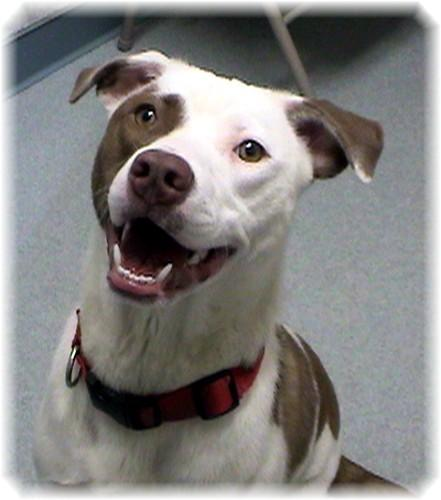

In [68]:
img

In [73]:
# Define augmentation pipeline with fixed parameters
transform = A.Compose([
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),
    A.RandomResizedCrop(height=200, width=200, scale=(0.5, 1.0), ratio=(0.75, 1.33),
                        interpolation=1, mask_interpolation=1, size=(200, 200), p=0.5),
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.5),
    A.CoarseDropout(max_holes=8, max_height=20, max_width=20, p=0.5),
])


<ipython-input-73-25ff9674e207>:9: UserWarning: Argument(s) 'height, width' are not valid for transform RandomResizedCrop
  A.RandomResizedCrop(height=200, width=200, scale=(0.5, 1.0), ratio=(0.75, 1.33),
<ipython-input-73-25ff9674e207>:11: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.5),
<ipython-input-73-25ff9674e207>:12: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=20, max_width=20, p=0.5),


In [74]:
output_dir = '/content/drive/MyDrive/image_augmentation'
os.makedirs(output_dir, exist_ok=True)

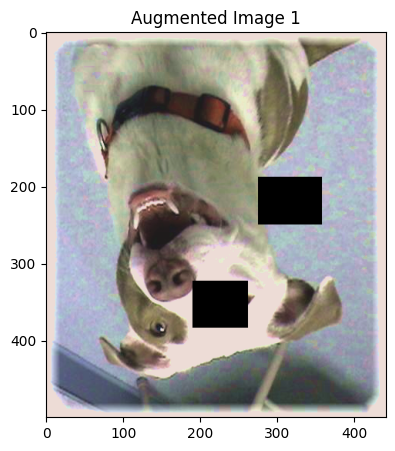

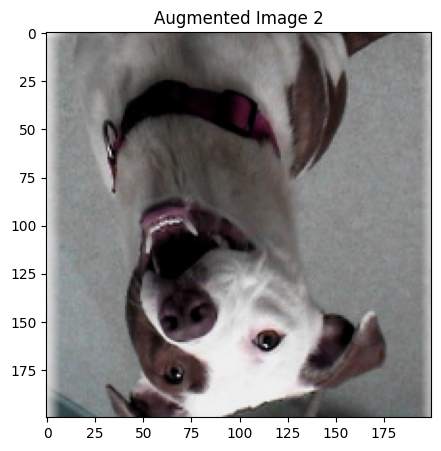

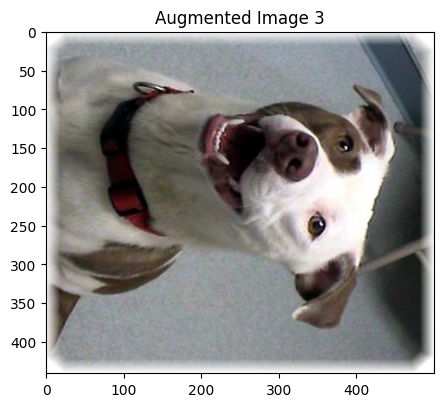

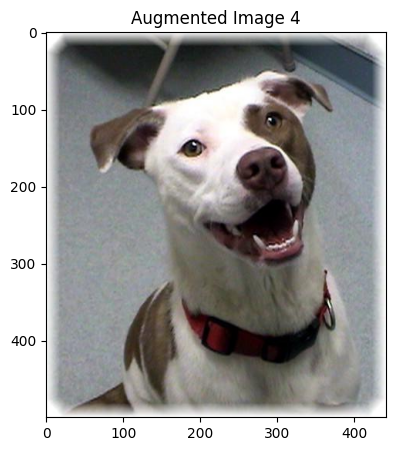

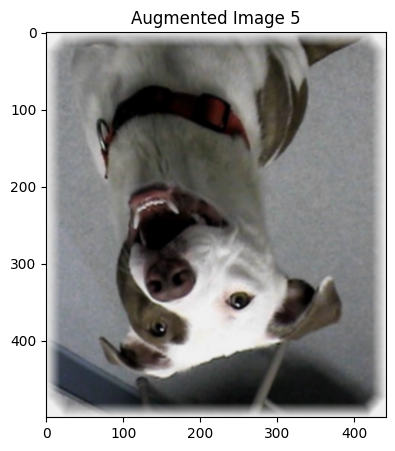

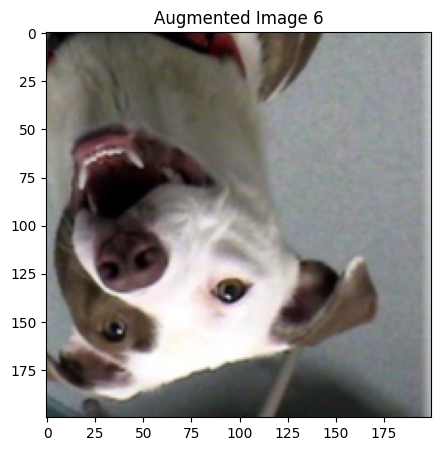

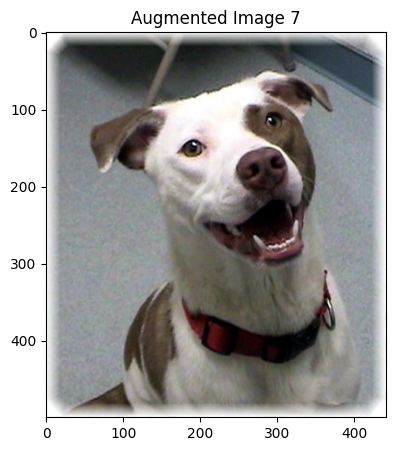

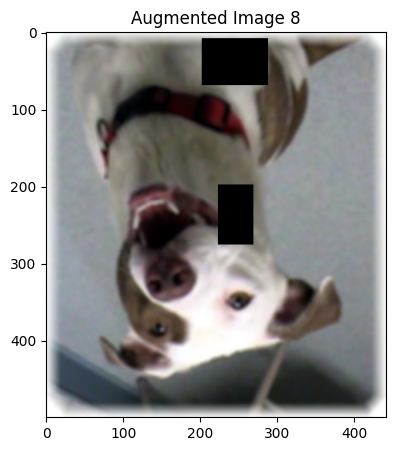

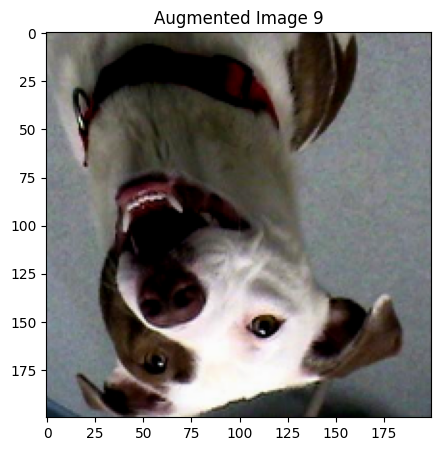

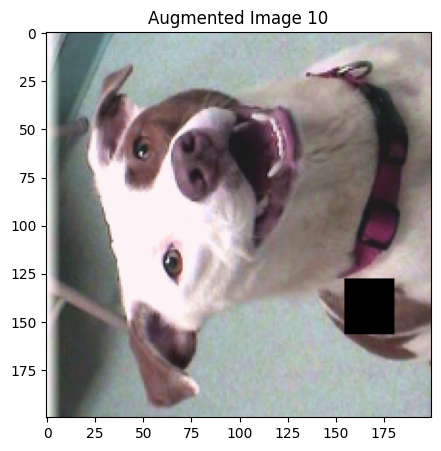

Images saved to /content/drive/MyDrive/image_augmentation


In [75]:
# Save 10 augmented images
for i in range(10):
    augmented = transform(image=img)
    augmented_img = augmented["image"]

    # Convert back to BGR for saving
    augmented_img_bgr = cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR)

    # Save the augmented image
    output_path = os.path.join(output_dir, f"augmented_image_{i+1}.jpg")
    cv2.imwrite(output_path, augmented_img_bgr)

    # Optionally display the augmented image
    plt.figure(figsize=(5,5))
    plt.imshow(augmented_img)
    plt.title(f"Augmented Image {i+1}")
    plt.show()

print(f"Images saved to {output_dir}")